In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")


/Users/stephenahiabah/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)
/Users/stephenahiabah/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:34: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ._gradient_boosting import predict_stages
/Users/stephenahiabah/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:34: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not mod

## Home Team Model

In [2]:
df = pd.read_csv("data/home_db.csv")

In [3]:
X = df.drop(["home_score"], axis=1)
y = df[["home_score"]]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Since model has few linear relationship, I'll test linear regression - to check if it's enough - and then I'll test Ensemble Methods, RF and GB

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

In [6]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

param_grid = {
    'regressor__fit_intercept': [True, False]
}

In [7]:
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

In [8]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring=mse_scorer, verbose=1)
grid_search.fit(X_train.values, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('regressor', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'regressor__fit_intercept': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=1)

In [9]:
print("Best Parameters:", grid_search.best_params_)
print("Best MSE:", grid_search.best_score_)


Best Parameters: {'regressor__fit_intercept': True}
Best MSE: -1.693630546667462


In [10]:
def residuals_plot(y_pred, y_test):
    residuals = y_test - y_pred
    
    plt.figure(figsize=(10, 6))
    
    sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title('Residuals vs Predicted Values')
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    #plt.plot([min(y_test), min(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs Predicted Values')
    plt.show()
    
    plt.figure(figsize=(10, 6))
    sns.histplot(residuals, kde=True)
    plt.xlabel('Residuals')
    plt.title('Distribution of Residuals')
    plt.show()

In [11]:
y_values = [a[0] for a in y_test.values]

In [12]:
y_pred = [a[0] for a in grid_search.predict(X_test.values)]#.mean()

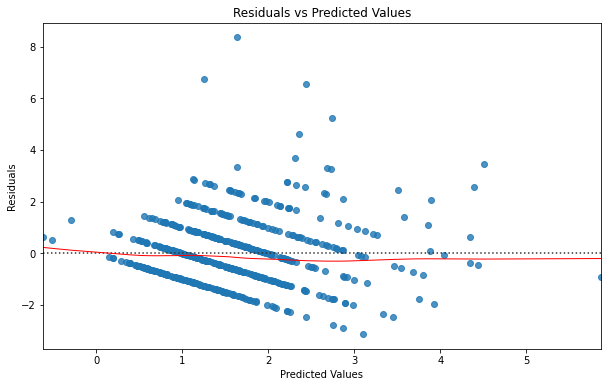

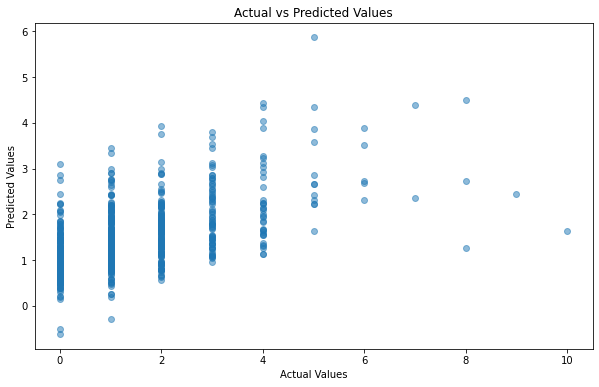

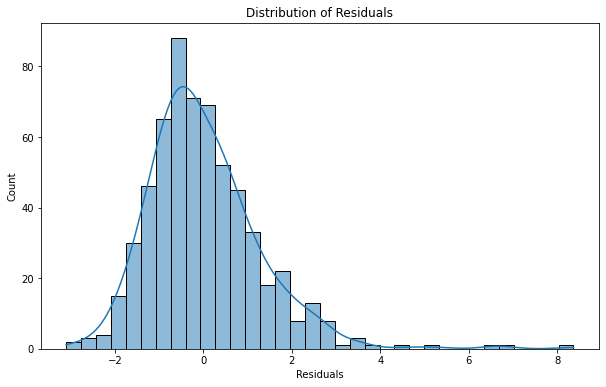

In [13]:
residuals_plot(np.array(y_pred), np.array(y_values))

In [14]:
rf_regressor = RandomForestRegressor()

# Define the hyperparameters to search
param_grid = {
    'n_estimators': [200, 300],  # Number of trees in the forest
    'max_depth': [10, 20],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'max_features': ['log2']  # Number of features to consider when looking for the best split
}

In [15]:
# Perform grid search with cross-validation using Mean Squared Error as the scoring function
grid_search = GridSearchCV(rf_regressor, param_grid, cv=5, scoring=mse_scorer, verbose=1)
grid_search.fit(X_train.values, np.ravel(y_train))

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  1.0min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [200, 300], 'max_depth': [10, 20], 'min_samples_split': [2, 5, 10], 'max_features': ['log2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=1)

In [16]:
test_mse = mean_squared_error(y_test, grid_search.predict(X_test.values))
print("Test Mean Squared Error:", test_mse)
print("Best Parameters:", grid_search.best_params_)
print("Best MSE Score:", grid_search.best_score_)

Test Mean Squared Error: 1.7332518701031296
Best Parameters: {'max_depth': 10, 'max_features': 'log2', 'min_samples_split': 10, 'n_estimators': 300}
Best MSE Score: -1.7505918226281356


In [17]:
y_pred = grid_search.predict(X_test.values)

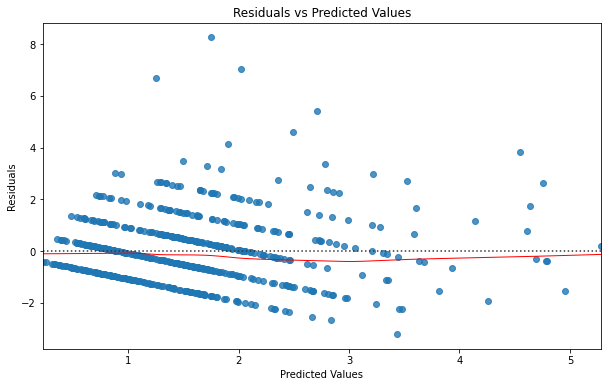

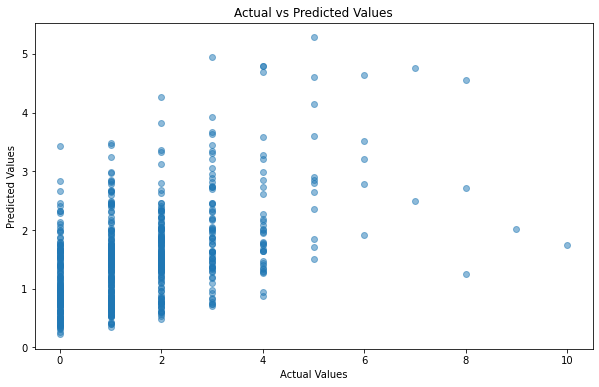

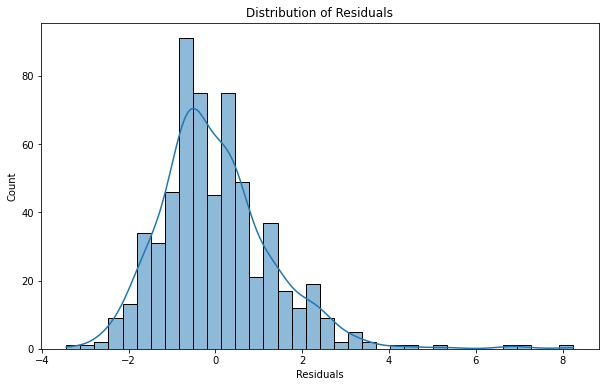

In [18]:
residuals_plot(y_pred, y_values)

In [19]:
rf = grid_search.best_estimator_

In [20]:
model = GradientBoostingRegressor()
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

In [21]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=mse_scorer, cv=5)
grid_search.fit(X_train.values, np.ravel(y_train))

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)

In [22]:
test_mse = mean_squared_error(y_test, grid_search.predict(X_test))
print("Test Mean Squared Error:", test_mse)
print("Best Parameters:", grid_search.best_params_)
print("Best MSE Score:", grid_search.best_score_)

Test Mean Squared Error: 1.656883397404135
Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
Best MSE Score: -1.7213639144097288


In [23]:
y_pred = grid_search.predict(X_test.values)

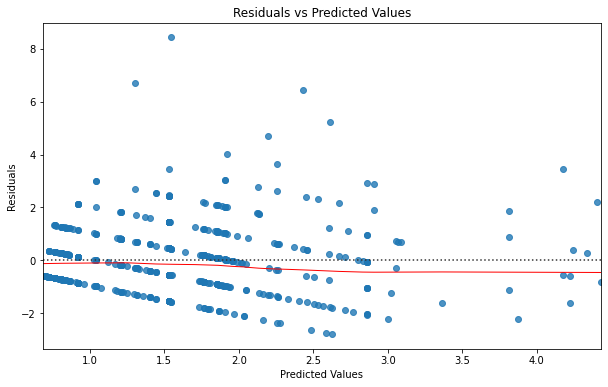

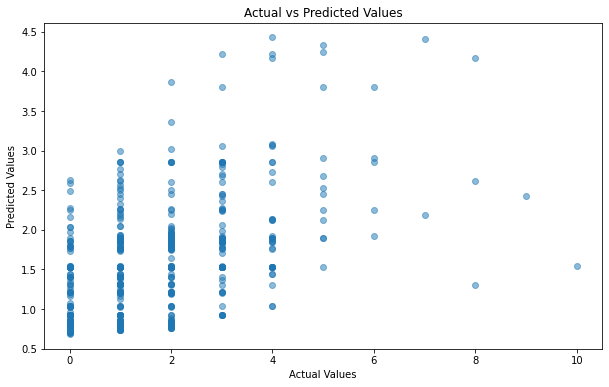

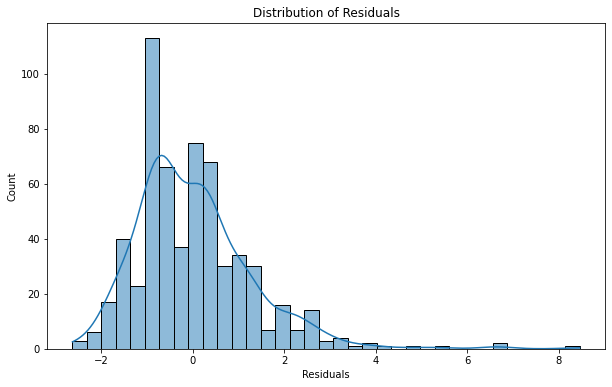

In [24]:
residuals_plot(y_pred, y_values)

In [25]:
import pickle

In [26]:
gb = grid_search.best_estimator_

In [27]:
with open('models/rf_home.pkl', 'wb') as f:
    pickle.dump(rf, f)

## Away Team Model

In [28]:
df = pd.read_csv("data/away_db.csv")

In [29]:
X = df.drop(["away_score"], axis=1)
y = df[["away_score"]]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

param_grid = {
    'regressor__fit_intercept': [True, False]
}

In [32]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring=mse_scorer, verbose=1)
grid_search.fit(X_train.values, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('regressor', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'regressor__fit_intercept': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=1)

In [33]:
print("Best Parameters:", grid_search.best_params_)
print("Best MSE:", grid_search.best_score_)

Best Parameters: {'regressor__fit_intercept': True}
Best MSE: -1.122998772287541


In [34]:
y_values = [a[0] for a in y_test.values]
y_pred = [a[0] for a in grid_search.predict(X_test.values)]#.mean()

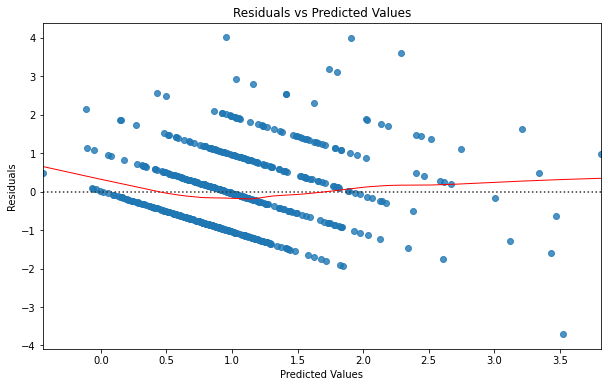

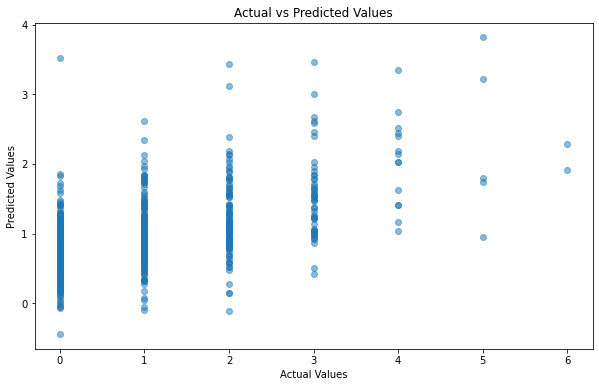

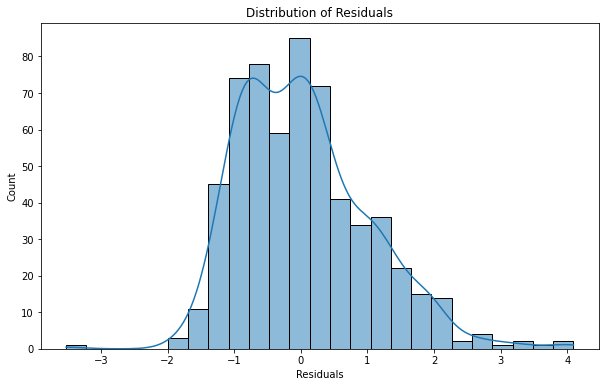

In [35]:
residuals_plot(np.array(y_pred), np.array(y_values))

In [36]:
lr = grid_search.best_estimator_

In [37]:
rf_regressor = RandomForestRegressor()

# Define the hyperparameters to search
param_grid = {
    'n_estimators': [200, 300],  # Number of trees in the forest
    'max_depth': [10, 20],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'max_features': ['log2']  # Number of features to consider when looking for the best split
}

In [38]:
# Perform grid search with cross-validation using Mean Squared Error as the scoring function
grid_search = GridSearchCV(rf_regressor, param_grid, cv=5, scoring=mse_scorer, verbose=1)
grid_search.fit(X_train.values, np.ravel(y_train))

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  1.6min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [200, 300], 'max_depth': [10, 20], 'min_samples_split': [2, 5, 10], 'max_features': ['log2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=1)

In [39]:
test_mse = mean_squared_error(y_test, grid_search.predict(X_test.values))
print("Test Mean Squared Error:", test_mse)
print("Best Parameters:", grid_search.best_params_)
print("Best MSE Score:", grid_search.best_score_)

Test Mean Squared Error: 0.9636224980542958
Best Parameters: {'max_depth': 10, 'max_features': 'log2', 'min_samples_split': 10, 'n_estimators': 200}
Best MSE Score: -1.1640257316291829


In [40]:
y_pred = grid_search.predict(X_test.values)

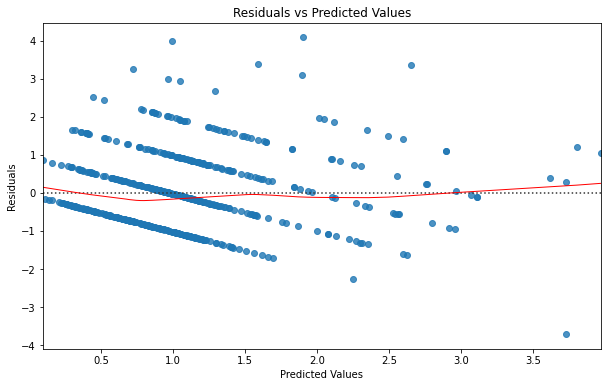

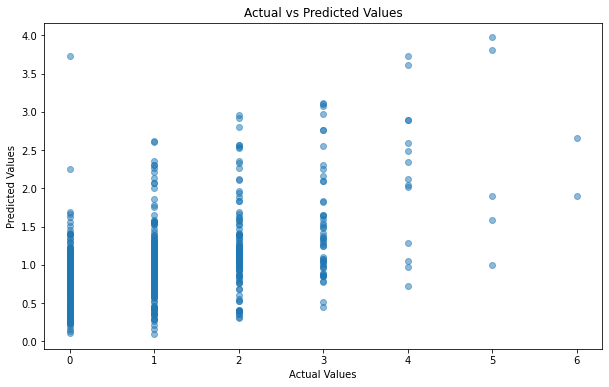

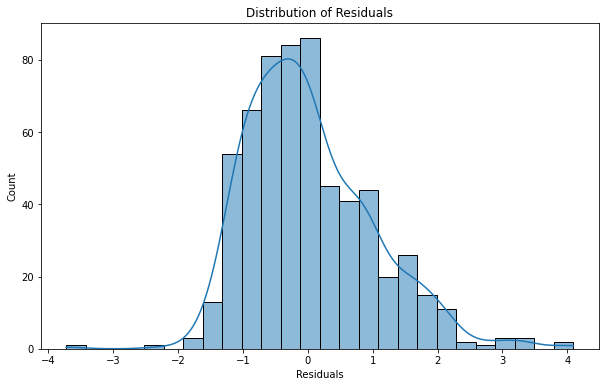

In [41]:
residuals_plot(y_pred, y_values)

In [42]:
rf = grid_search.best_estimator_

In [43]:
model = GradientBoostingRegressor()
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

In [44]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=mse_scorer, cv=5)
grid_search.fit(X_train.values, np.ravel(y_train))

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)

In [45]:
test_mse = mean_squared_error(y_test, grid_search.predict(X_test.values))
print("Test Mean Squared Error:", test_mse)
print("Best Parameters:", grid_search.best_params_)
print("Best MSE Score:", grid_search.best_score_)

Test Mean Squared Error: 0.9677857709380336
Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
Best MSE Score: -1.1414590447036086


In [46]:
y_pred = grid_search.predict(X_test.values)

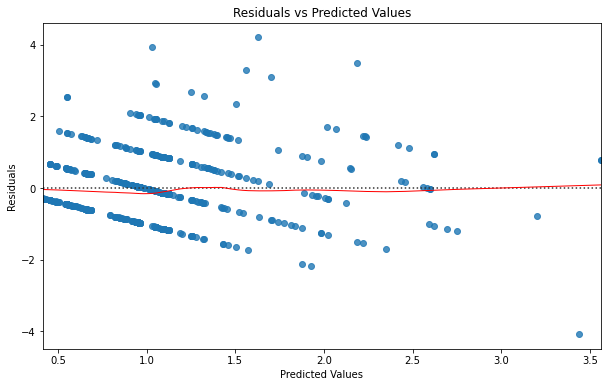

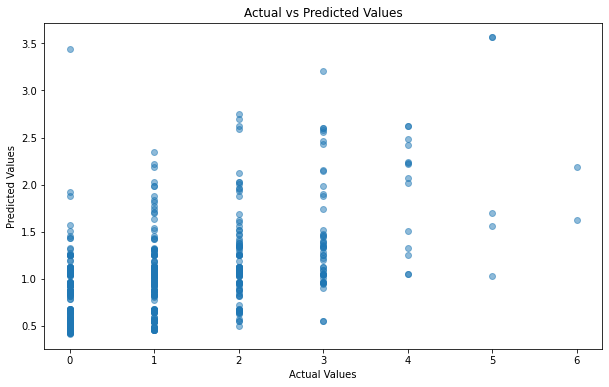

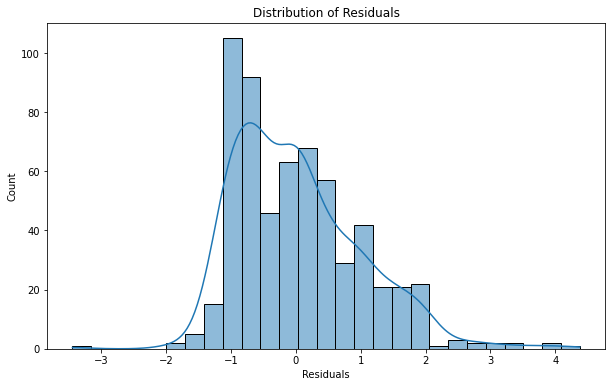

In [47]:
residuals_plot(y_pred, y_values)

In [48]:
with open('models/rf_away.pkl', 'wb') as f:
    pickle.dump(rf, f)